# Mushroom Hunting
Lab Assignment One: Exploring Table Data

**_Jake Oien, Seung Ki Lee, Jenn Le_**

## Business Understanding

This data can be useful in identifying trends in poisonous mushrooms and assist in the classification of unknown mushrooms.

From the dataset's description: 
"This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy."

According to http://www.amjbot.org/content/98/3/426.full, TODO cite there are estimated to be upwards of 5 million species of fungi, with only around 100,000 of them having been discovered and documented. At estimated discovery rates of 1200 species per year, scientists estimate it could take as long as 4000 years to discover all species of fungi. 

What this means is that only the tip of the iceberg has been studied as far as fungi is concerned. The dataset mentions that "shrooming" is experiencing a boom in popularity. With such a low percentage of documented fungi, it's possible that someone walking through a forest could happen upon a species of mushroom that's never been seen. People are curious, and someone is bound to want to try eating this strange mushroom. 

The end goal of analysing a dataset like this would be to classify an unknown specimen of mushroom as edible or poisonous. As the Audobon Society Field Guide says, "there is no simple rule for determining the edibility of a mushroom." This might be true. But, there may be some underlying pattern between a collection of variables in a mushroom that might provide a (slightly more complex) rule for if a mushroom is poisonous or not. This may not be a "sexy" avenue of research for machine learning, but a successful classification algorithm could open a door into further research to help better understand broader categories of fungi, and better understanding about the life with which we share the planet.

### Measure of success

Now, to discuss what a successful algorithm actually means, or, how do we determine if a machine learning algorithm is a success on this dataset. 

If the algorithm is learning properly, we should expect the success rate to be better than random chance (in this case 50%). Obviously, we should not expect to achieve a 100% success rate, but we should strive for as close as possible. There are two main "users" that could benefit from a successful classification, one being a scientist and the other being a potential consumer of unknown mushrooms. 

A scientist might look at the data and say that a 90% true positive rate on classification is "good enough" for further research, and digging into why certain classifications failed or succeeded might provide more insight into mushrooms as a whole. A success rate around that range would show that the algorithm is sound, and perhaps just needs some fine tuning or more data to achieve a higher success rate. 

However, the consumer of unknown mushrooms should not be content with a 90% true positive rate. False negatives would not be of a concern. They're not missing out on much except a new experience, after all. However, a 10% false positive rate would mean that 1 out of 10 times, an app that tells you "This mushroom is safe to eat" would be wrong and you would die. In order to be used on a consumer level, a very low false positive rate would be required to be remotely acceptable. To answer the question of if the machine learning algorithm is acceptable for use in aiding a "mushroom enthusiast," we should look at other levels of risk that are accepted in similar situations. 

Fugu (pufferfish) is dish that if prepared improperly, can cause at the least severe poisoning and at worst death. Despite that, people still eat the dish, because they trust that the chef who prepares it knows what they are doing.  According to http://www.fukushihoken.metro.tokyo.jp/shokuhin/hugu/, 354 people in Japan suffered adverse effects from eating poorly prepared fugu over the last 10 years. The statistic for how many people ate fugu in that time is not known, but we can come up with a skeptical number to compare that adverse effect rate to the false positive rate of the algorithm. According to http://www.worldometers.info/world-population/japan-population/, Japan's current population is just under 126 million people. Of course, everyone in Japan did not eat fugu in that time. So if we use a conservative estimate that 1% of the population ate fugu one time during that 10 year period we get:

In [7]:
adverse_effects = 354
japanese_population = 125000000
total_fugu_consumption_estimate = japanese_population/100 # 1% of the population ate fugu one time

print("Estimated rate of adverse effects due to fugu consumption: {}"
      .format(adverse_effects/total_fugu_consumption_estimate))

Estimated rate of adverse effects due to fugu consumption: 0.0002832


This is one means by which an algorithm should be held to a false positive rate. This is just an estimate, because without per capita consumption estimates, a best guess is all we can hope for. However, at the bare minimum, someone should be more confident in the algorithm telling them that a random mushroom is safe to eat than they should be that their highly trained chef in a controlled environment prepared their deadly dish properly. Thus, the requirements for success for human consumption are (obviously) quite high. 

Dataset Source: https://www.kaggle.com/uciml/mushroom-classification

## Data Understanding

In [78]:
import pandas as pd
import numpy as np

df = pd.read_csv('./mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Data Value Replacements

This data is extremely confusing since we don't inherently know what any of the labels mean. In order to make it more intuitive, we replace the labels with more meaningful values, descriptive labels or variable representations where it makes sense.

The main point of this dataset is to classify whether or not a mushroom is possibly poisonous. To make this point clear, we change the class values from "e" and "p" to a binary value of either 0 or 1. We use the same binary value to indicate whether or not a mushroom has bruises. For number of rings, we replace the letters with the numerical value of the number of rings. Every other value is replaced with its descriptive label to make the data easier to read. We also changed the column names to snake case to be more in line with naming conventions.

In [79]:
# Changing column names
for col_name, col in df.iteritems():
    df.rename(columns={col_name:col_name.replace('-', '_')}, inplace=True)

# Replacing data values, also shows the possible values for each attribute
df["class"].replace(to_replace=['e', 'p'],
                     value=[0, 1], inplace=True)

df.cap_shape.replace(to_replace=['b', 'c', 'x', 'f', 'k', 's'],
                     value=["bell", "conical", "convex", "flat", "knobbed", "sunken"],
                     inplace=True)

df.cap_surface.replace(to_replace=['f', 'g', 'y', 's'],
                     value=["fibrous", "grooves", "scaly", "smooth"], 
                     inplace=True)

df.cap_color.replace(to_replace=['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "green", "pink", 
                            "purple", "red", "white", "yellow"], 
                     inplace=True)

df.bruises.replace(to_replace=['f', 't'],
                     value=[0, 1], 
                     inplace=True)

df.odor.replace(to_replace=['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
                     value=["almond", "anise", "creosote", "fishy", "foul", 
                            "musty", "none", "pungent", "spicy"], 
                     inplace=True)

df.gill_attachment.replace(to_replace=['a', 'd', 'f', 'n'],
                     value=["attached", "descending", "free", "notched"], 
                     inplace=True)

df.gill_spacing.replace(to_replace=['c', 'w', 'd'],
                     value=["close", "crowded", "distant"], 
                     inplace=True)

df.gill_size.replace(to_replace=['b', 'n'],
                     value=["broad", "narrow"], 
                     inplace=True)

df.gill_color.replace(to_replace=['k', 'n', 'b', 'h', 'g', 'r', 'o', 
                                  'p', 'u', 'e', 'w', 'y'],
                     value=["black", "brown", "buff", "chocolate", "gray", 
                            "green", "orange", "pink", "purple", "red", "white", "yellow"], 
                     inplace=True)

df.stalk_shape.replace(to_replace=['e', 't'],
                     value=["enlarging", "tapering"], 
                     inplace=True)

df.stalk_root.replace(to_replace=['b', 'c', 'u', 'e', 'z', 'r', '?'],
                     value=["bulbous", "club", "cup", "equal", "rhizomorphs", 
                            "rooted", "missing"], 
                     inplace=True)

df.stalk_surface_above_ring.replace(to_replace=['f', 'y', 'k', 's'],
                     value=["fibrous", "scaly", "silky", "smooth"], 
                     inplace=True)

df.stalk_surface_below_ring.replace(to_replace=['f', 'y', 'k', 's'],
                     value=["fibrous", "scaly", "silky", "smooth"], 
                     inplace=True)

df.stalk_color_above_ring.replace(to_replace=['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "orange", 
                            "pink", "red", "white", "yellow"], 
                     inplace=True)

df.stalk_color_below_ring.replace(to_replace=['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "orange", 
                            "pink", "red", "white", "yellow"], 
                     inplace=True)

df.veil_type.replace(to_replace=['p', 'u'],
                     value=["partial", "universal"], 
                     inplace=True)

df.veil_color.replace(to_replace=['n', 'o', 'w', 'y'],
                     value=["brown", "orange", "white", "yellow"], inplace=True)

df.ring_number.replace(to_replace=['n', 'o', 't'],
                     value=[0, 1, 2], inplace=True)

df.ring_type.replace(to_replace=['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
                     value=["cobwebby", "evanescent", "flaring", "large", 
                            "none", "pendant", "sheathing", "zone"], 
                     inplace=True)

df.spore_print_color.replace(to_replace=['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
                     value=["black", "brown", "buff", "chocolate", "green", 
                            "orange", "purple", "white", "yellow"], 
                     inplace=True)

df.population.replace(to_replace=['a', 'c', 'n', 's', 'v', 'y'],
                     value=["abundant", "clustered", "numerous", "scattered", 
                            "several", "solitary"], 
                     inplace=True)

df.habitat.replace(to_replace=['g', 'l', 'm', 'p', 'u', 'w', 'd'],
                     value=["grasses", "leaves", "meadows", "paths", "urban", 
                            "waste", "woods"], 
                     inplace=True)

df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,convex,smooth,brown,1,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,0,convex,smooth,yellow,1,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,0,bell,smooth,white,1,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,1,convex,scaly,white,1,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,0,convex,smooth,gray,0,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


In [80]:
# Show the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int64
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null int64
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number  

Most of the attributes are sensory descriptors so we store them as objects in the pandas dataframe. The only attributes that are stored as numerical values are those such as "poisonous" which has a binary value or those such as "ring_number" which would have an ordinal value.

Besides "ring_number", which is ordinal, all of the attributes in our data are nominal. They're either categorical or binary. 

In [81]:
# Percentage of possibly poisonous mushrooms in the dataset
sum(df["class"]==1)/len(df)*100.0

48.202855736090591

### Data Quality

There are two things we look for to determine data quality; missing values and duplicate data. First, we'll look for missing values. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
poisonous                   8124 non-null int64
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null int64
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number  

We see that there are 8124 rows in the data set, and that no rows have any missing columns. So, from that point, the data is good. Now we should check for duplicate rows in the dataset. 

In [20]:
duplicate_count = 0
for val in df.duplicated():
    if val == 'True':
        duplicate_count += 1

print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


We see that there are no duplicate rows in this dataset either. 

The lack of duplicate rows and the fact that none of the columns are missing any values makes sense, as the description for the dataset says itself that the dataset has been lightly cleaned before publication. 

## Data Visualization

### Single Attribute Analysis

When it comes to plants and animals, poisonous ones can usually be identified by their color or odor so we'll first take a look at those to see if our data reflects that at all.

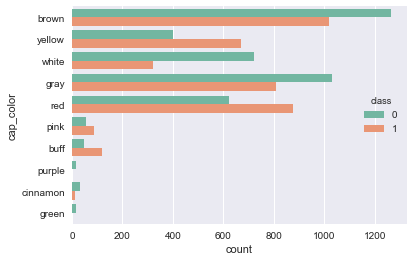

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.countplot(y=df.cap_color, hue=df["class"], palette="Set2")

In [83]:
# Grouping by odor and seeing the percentage of poisonous mushrooms
df_grouped_odor = df.groupby(by='odor')
print('---------------------------------------')
print('Poison by Odor:')
print(df_grouped_odor["class"].sum() / df_grouped_odor["class"].count())

---------------------------------------
Poison by Odor:
odor
almond      0.000000
anise       0.000000
creosote    1.000000
fishy       1.000000
foul        1.000000
musty       1.000000
none        0.034014
pungent     1.000000
spicy       1.000000
Name: class, dtype: float64


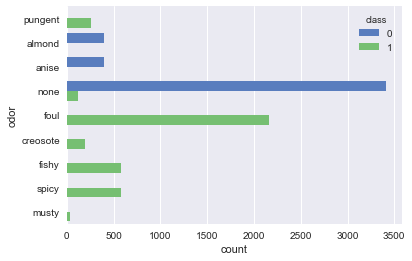

In [84]:
sns.countplot(y=df.odor, hue=df["class"], palette="muted")

From this data, we can tell that odor is a much better indicator of poison than color. According to our data, a mushroom that has an odor other than almond or anise is definitely poisonous. Besides "musty", the sizes of each odor group is fairly considerable and with a 100% rate in all but the "none" group, odor is definitely a factor that can't be ignored. On the other hand, the color doesn't seem to be a clear indicator of poison, as all of the color groups have a good amount of both edible and poisonous mushrooms, or just don't have enough instances for us to be sure.

#### Environment

Population, habitat, and bruises are attributes that tell us more about the type of conditions the mushroom can be found in. We'll take a look at the distributions of each of these attributes to see if one is a good indication of poison.

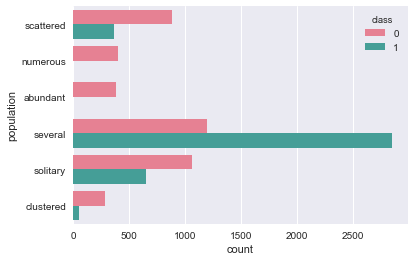

In [85]:
sns.countplot(y=df.population, hue=df["class"], palette="husl")

It seems like with "numerous", "abundant", and "clustered", there is a high chance of the mushroom not being poisonous. It could be argued that these labels are ambiguous and so don't make for the best attributes, however, the only labels that really are ambiguous are "numerous" and "abundant", both of which have a 100% edible rate in our data. According to this data, poisonous mushrooms are typically found alone or in a smaller group, usually scattered rather than clustered.

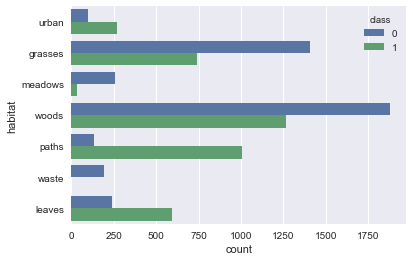

In [86]:
sns.countplot(y=df.habitat, hue=df["class"])

From the habitat distribution, it seems to be that poisonous mushrooms are more likely to be found in urban settings and on paths rather than meadows or waste. The other attributes have poison rates close to 50% so they aren't very meaningful alone, even though there are fairly clear distinctions on whether the particular envrionment favors edible or poisonous mushrooms.

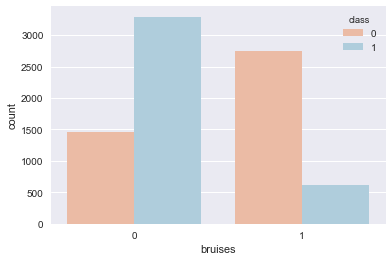

In [88]:
sns.countplot(df.bruises, hue=df["class"], palette="RdBu")

The last of our envrionment attributes, bruises, shows that mushrooms without bruises are more likely to be poisonous while mushrooms with bruises are more likely to be edible. This can indicate that poisonous mushrooms are tougher than edible ones. Adding to this dataset attributes such as elasticity or texture might make it more accurate.

Since "ring_number" is our only non-nominal attribute, let's also take a look at that.

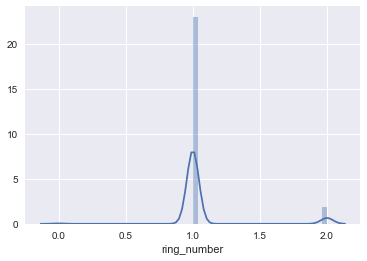

In [94]:
sns.distplot(df.ring_number)

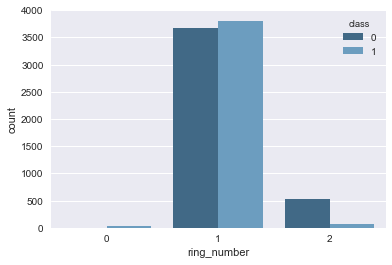

In [93]:
sns.countplot(df.ring_number, hue=df["class"], palette="Blues_d")

In [91]:
# Grouping by odor and seeing the percentage of poisonous mushrooms
df_grouped_ring_num = df.groupby(by='ring_number')
print('---------------------------------------')
print('Poison by Ring Number:')
print(df_grouped_ring_num["class"].sum() / df_grouped_ring_num["class"].count())

---------------------------------------
Poison by Ring Number:
ring_number
0    1.000000
1    0.508547
2    0.120000
Name: class, dtype: float64


In [92]:
df_grouped_ring_num["class"].count()

ring_number
0      36
1    7488
2     600
Name: class, dtype: int64

The majority of our dataset includes mushrooms that have 1 ring and of these, they are almost evenly split on poisonous vs edible. Mushrooms with no rings, however, are all poisonous in our dataset and mushrooms with two rings are more likely to be edible. This can't really be trusted in terms of the no ring category, though, since there are only 36 instances in the entire 8000+ dataset that have no rings.

## Correlation Matrix

In order to see the relationships between ordinal features, we composed a correlation matrix.

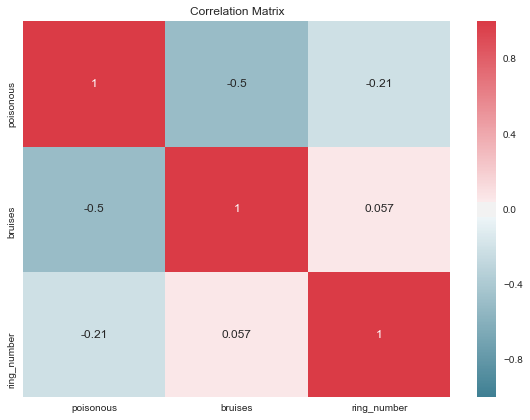

In [6]:
sns.set(style="white", color_codes=True)

#correlation matrix
corr = df.corr()

#matplotlib set up
f, ax = plt.subplots(figsize=(8,6))

#set up colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

#compute heatmap
sns.heatmap(corr, cmap = cmap, annot=True)
plt.title('Correlation Matrix')
f.tight_layout()

For our data, there are only three attributes represented as numerical values. The most notable and strong correlation suggests that bruises are negatively correlated with toxicity. On the other hand toxicity of mushroom is is also negatively correlated despite the weak correlation. Existence of bruises and number of rings show no significant correlation.

To see further correlations on accounts of nominal attributes, we've create plots to represent average probability of a mushroom being toxic for each attributes. To best show the average probability of toxicity in relation to nominal attributes, we chose factor plots.

## Factor Plots

Aside from the ones we went over in countplots, the nominal attributes for this data can be grouped into four major groups 

1. Cap
2. Gill
3. Stalk
4. Veil & Ring

While the (odor, environment, population) is well represented with count plots, we created factor plots to visualize rough "probability" of attributes and how they are related to Toxicity of the Mushroom. 1 is poisonous and 0 is edible on poisonous class.

So if we see a trait that maps to a number close to average toxicity (marked as poisonous) of 1, we know that attribute has high probability of the mushroom being poisonous and vice versa. On the other hand, average poisonous field amounting to 0.5 shows that set trait does not have significant ties with toxicity of the mushroom and we should rely on other measures to determine whether a mushroom is poisonous.

### Cap Attribute Group

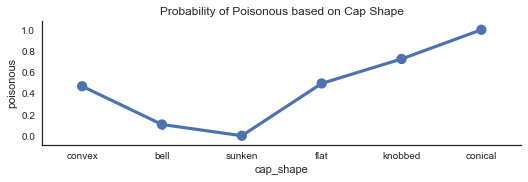

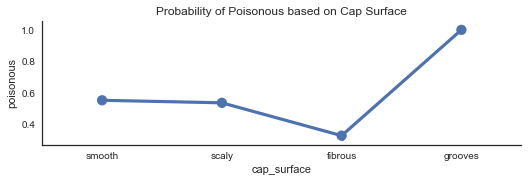

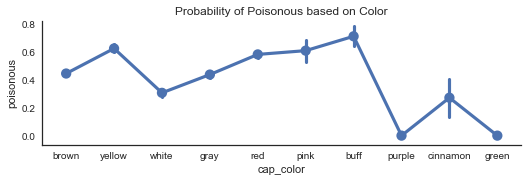

In [7]:
# nominal attributes related to Cap
sns.factorplot(y="poisonous", x="cap_shape", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Cap Shape')
sns.factorplot(y="poisonous", x="cap_surface", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Cap Surface')
sns.factorplot(y="poisonous", x="cap_color", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Color')

On regards to cap, the following traits in a mushroom suggests more likelihood of toxicity : 

1. conical cap shape
2. grooves cap surface

And the following traits suggests more likelihood of edibility : 

1. sunken shape
2. purple and green cap color

As we've seen in countplots, it is difficult to assume the toxicity of mushroom base on the color of the cap, but the shape and surface can act as a good indicator of toxicity.

### Gill Attribute Group

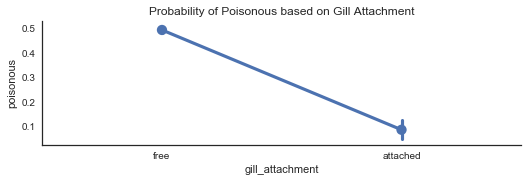

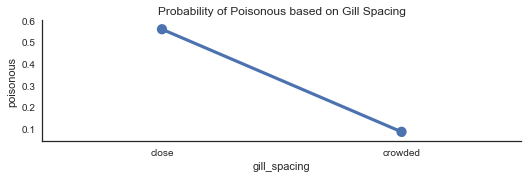

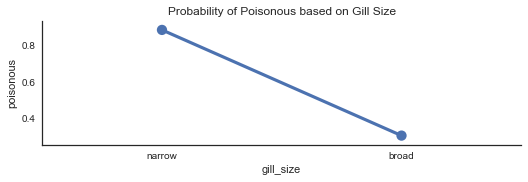

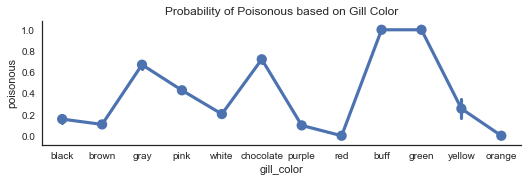

In [19]:
# nominal attributes related to Gill
sns.factorplot(y="poisonous", x="gill_attachment", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Gill Attachment')
sns.factorplot(y="poisonous", x="gill_spacing", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Gill Spacing')
sns.factorplot(y="poisonous", x="gill_size", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Gill Size')
sns.factorplot(y="poisonous", x="gill_color", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Gill Color')

On regards to gill, the following traits in a mushroom suggests more likelihood of toxicity : 

1. buff and green gill color

And the following traits suggests more likelihood of edibility : 

1. red and orange gill color

Following presented no strong correlation :

1. Attachment of the Gill
2. Spacing of the Gill
3. Size of the Gill

While the cap colors are not a good indicator of toxicity, Gill colors showed that some colors can be a good determinant. Interestingly, all information except for the color of the gill aren't useful in telling whether the mushroom is poisonous.
    
### Stalk Attribute Group   

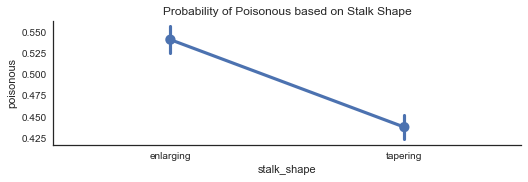

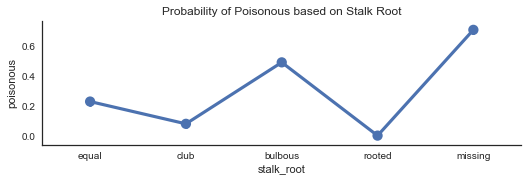

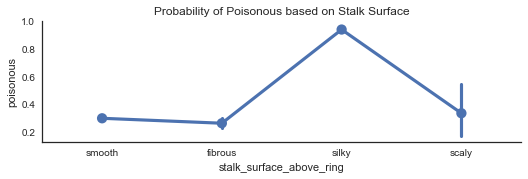

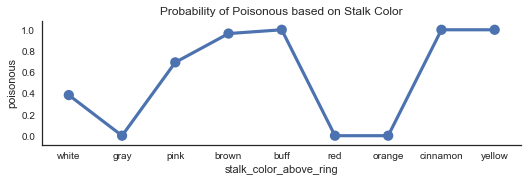

In [9]:
# nominal attributes related to Stalk

# NOTE: below ring attributes turns out to be identical to above ring. 
# Taken out for efficiency.

sns.factorplot(y="poisonous", x="stalk_shape", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Stalk Shape')
sns.factorplot(y="poisonous", x="stalk_root", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Stalk Root')
sns.factorplot(y="poisonous", x="stalk_surface_above_ring", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Stalk Surface')
sns.factorplot(y="poisonous", x="stalk_color_above_ring", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Stalk Color')



On regards to stalk, the following traits in a mushroom suggests more likelihood of toxicity : 

1. silky surface above & below ring
3. yellow, cinnamon, buff, and brown color above and below ring

And the following traits suggests more likelihood of edibility : 

1. rooted stalk
2. gray, red, and orange color above & below ring

The shape of the stalk had no significant relationship with toxicity of the mushroom. It seems that silky stalks along with yellow, cinnamon, buff and brown almost definitely implies poison.

    
### Veil & Ring Attribute Group    

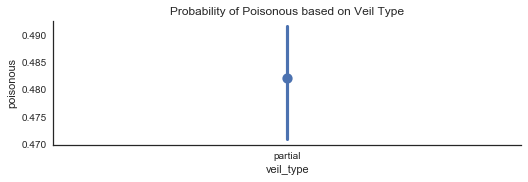

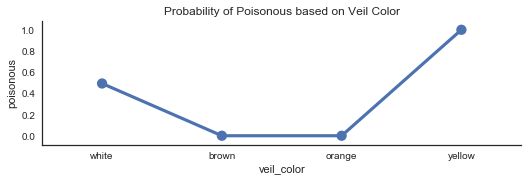

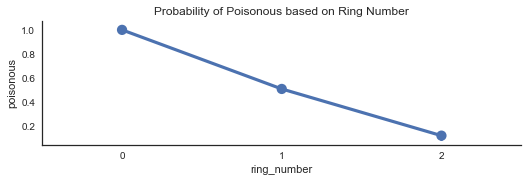

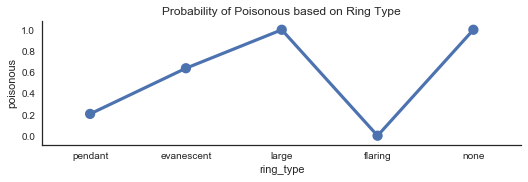

In [10]:
#nominal attributes related to veil & ring
sns.factorplot(y="poisonous", x="veil_type", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Veil Type')
sns.factorplot(y="poisonous", x="veil_color", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Veil Color')
sns.factorplot(y="poisonous", x="ring_number", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Ring Number')
sns.factorplot(y="poisonous", x="ring_type", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Ring Type')


On regards to veil & ring, the following traits in a mushroom suggests more likelihood of toxicity : 

1. yellow veil color
2. no ring
3. large ring type

And the following traits suggests more likelihood of edibility : 

1. brown and orange veil color
2. Two rings
3. flaring ring type

The type of the veil which were all partial had no significant relationship with toxicity of the mushroom.


## Extra Analysis on interesting feature

We've seen that some features are good indicators of toxicity of the mushroom. One of the more distinctive features is odor. For this data, each odor definitely tells us whether a mushroom is poisonous or not - except for one group : the "none" odor. 

We also have a group of attributes that is not a good indicator of toxicity : the cap colors. For extra analysis, we tried to analyze the relationship between one highly correlated attribute and one less correlated attribute in order to further classify the data.

In [76]:
df_grouped = df.groupby(['odor','cap_color'])

print(df_grouped["poisonous"].sum() / df_grouped["poisonous"].count())
print ("\n ============================== \n")
print(df_grouped["poisonous"].count())
print ("\n ============================ \n")
print(df_grouped["poisonous"].sum())


odor      cap_color
almond    brown        0.000000
          white        0.000000
          yellow       0.000000
anise     brown        0.000000
          white        0.000000
          yellow       0.000000
creosote  gray         1.000000
          pink         1.000000
          white        1.000000
fishy     brown        1.000000
          red          1.000000
foul      brown        1.000000
          buff         1.000000
          gray         1.000000
          red          1.000000
          white        1.000000
          yellow       1.000000
musty     brown        1.000000
          cinnamon     1.000000
          red          1.000000
none      brown        0.013514
          buff         0.333333
          cinnamon     0.000000
          gray         0.000000
          green        0.000000
          pink         0.300000
          purple       0.000000
          red          0.000000
          white        0.071429
          yellow       1.000000
pungent   brown     

The interesting relation comes out when we look into the composition of "none" odor data. We can see that for cap colors cush as cinnamon, gray, green, purple and red, the none odor implies non-poisonous 100% of the time. for white and brown color, the probability of it being toxic is very low. In this data, we can single out the yellow capped & odorless mushrooms for being "100% poisonous" mushroom. We can also see that while the white capped and odorless mushrooms have much smaller probability of being poisonous, the absolute number of poisonous mushrooms under this description is larger than yellow capped ones. We can conclude that while yellow capped and odorless mushrooms are very poisonous, they are very rare as well.